In [1]:
import acalib

In [2]:
from astropy.table import Table
rep=Table.read('REP-OMC3-HC3N.fits', format='fits')

In [3]:
syn = acalib.load("SYN-OMC3-HC3N.fits")
res = acalib.load("RES-OMC3-HC3N.fits")

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]


In [4]:
# Bugix (we save correctly the wcs, but not the meta... and the wcs is created from meta!)
# Therefore, we need to remove the stokes axis by hand 
syn=acalib.Data(syn.data,wcs=syn.wcs.dropaxis(3),meta=syn.meta,unit=syn.unit,mask=syn.mask)
res=acalib.Data(res.data,wcs=res.wcs.dropaxis(3),meta=res.meta,unit=res.unit,mask=res.mask)


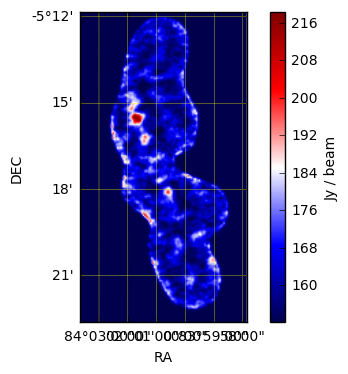

OrderedDict([('SHIFT', -4.224293231964111),
             ('SCALE', 1791472.125),
             ('SNR', 1.593),
             ('DELTAX', 1),
             ('KERNEL', 'METABUBBLE'),
             ('GAMMA', 0.1),
             ('NOISE', 1.53892316773532e-06),
             ('DELTAZ', 2.0),
             ('DELTAY', 2.0)])

In [5]:
img=acalib.HRep.toImage(rep,syn)
img.visualize_image(cmap="seismic")
rep.meta

In [6]:
tree = acalib.HRTree(rep,syn)

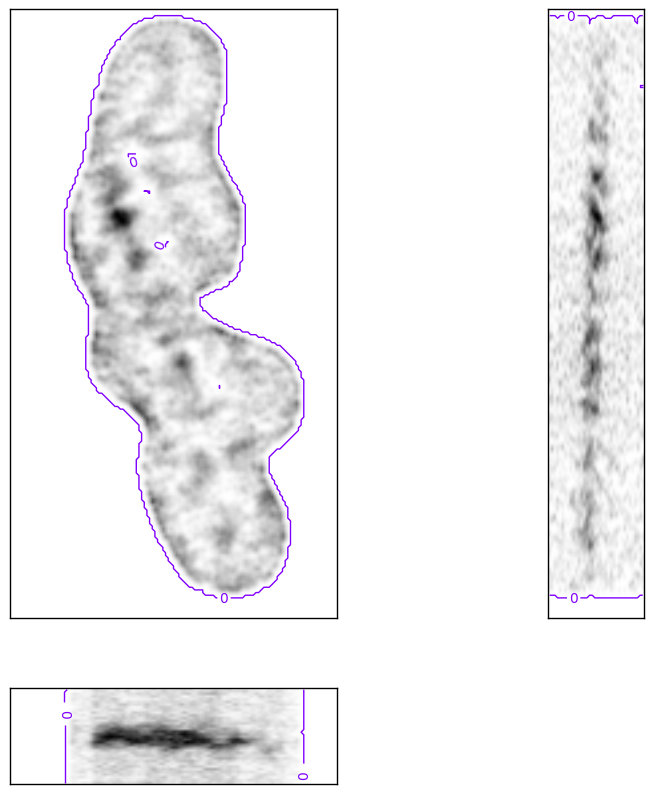

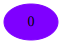

In [7]:
tree.show()

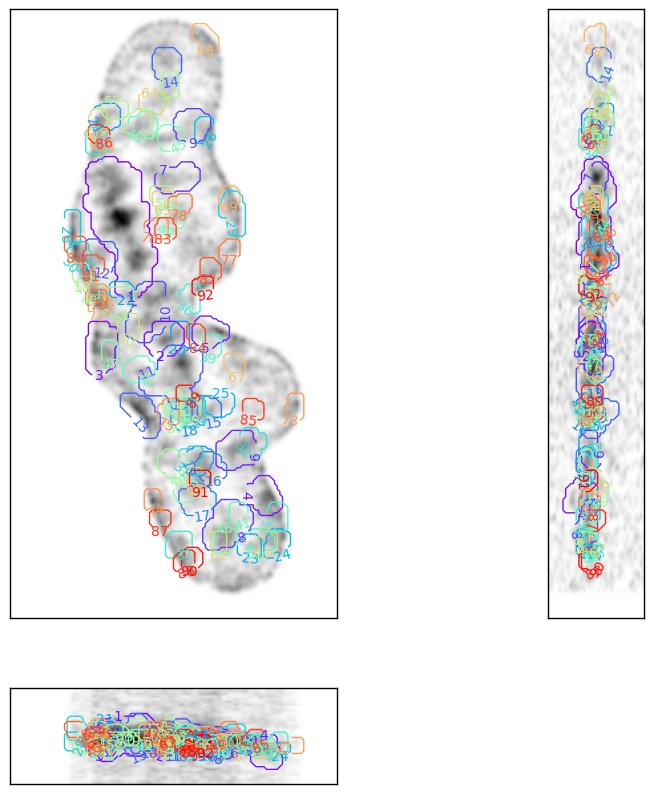

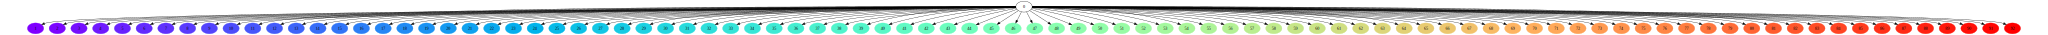

In [8]:
tree.clusterize(0,method='DBSCAN',param=2.0)
tree.show()

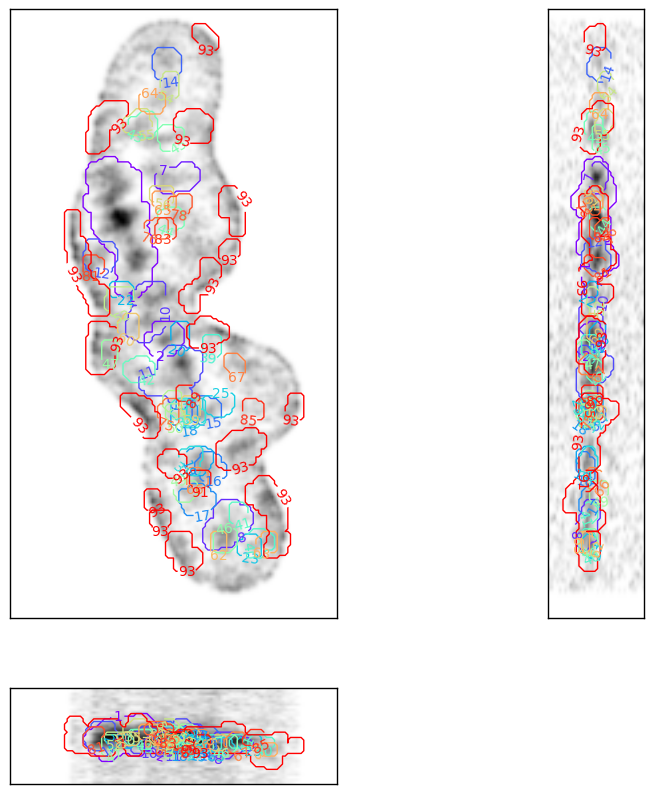

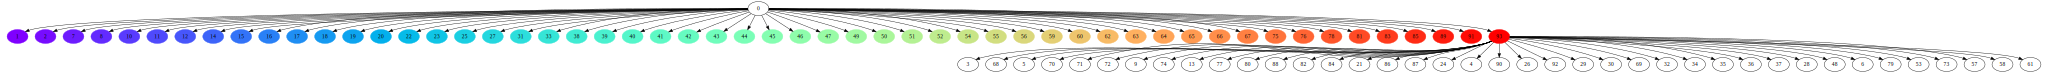

In [9]:
border=[68,21,86,28,80,30,3,13,74,87,90,35,24,37,4,9,32,73,5,36,92,82,77,29,26,70,61,53,79,71,88,34,57,69,58,48,6,72,84]
tree.group(border)
tree.show()

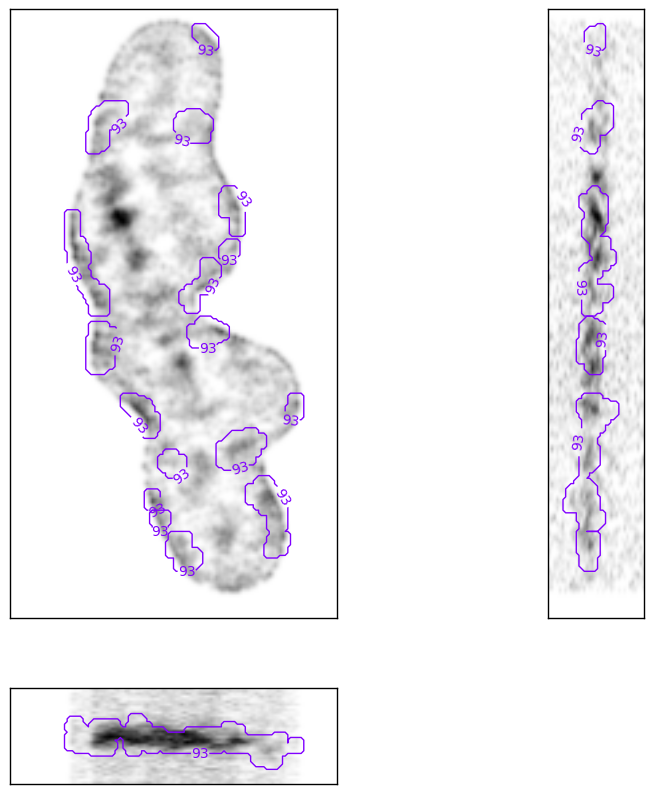

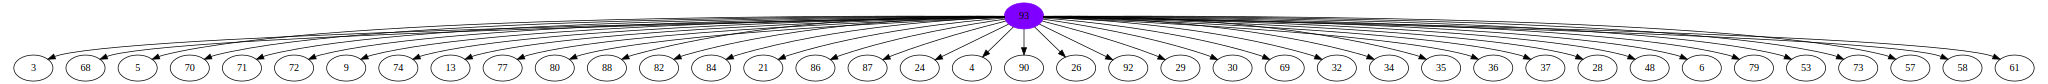

In [10]:
tree.show(node=93)

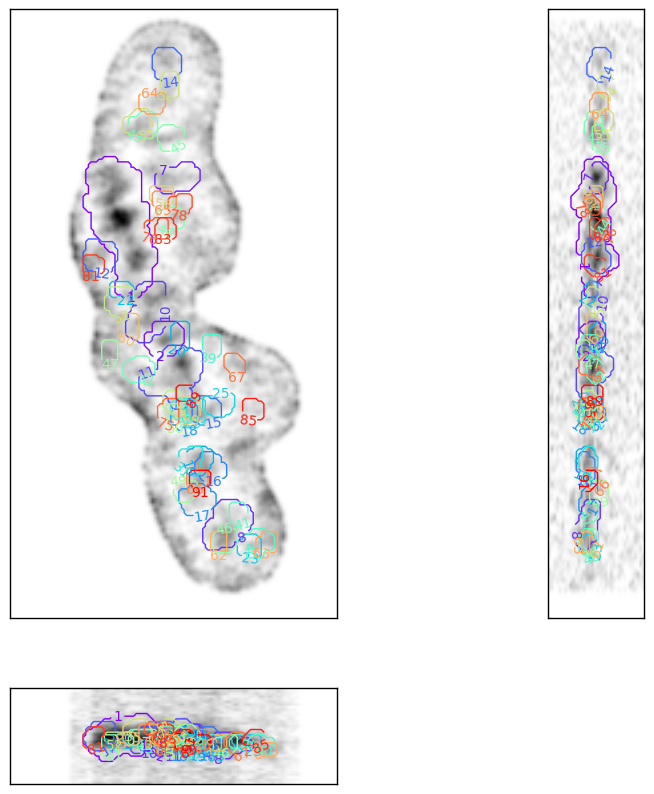

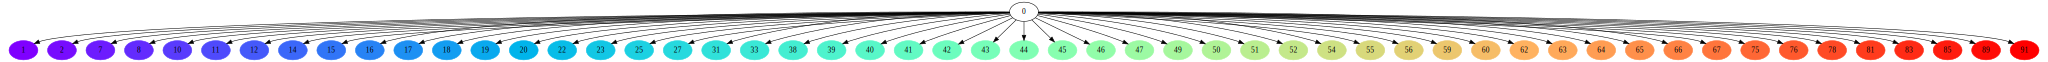

In [11]:
tree.disable(93)
tree.show()

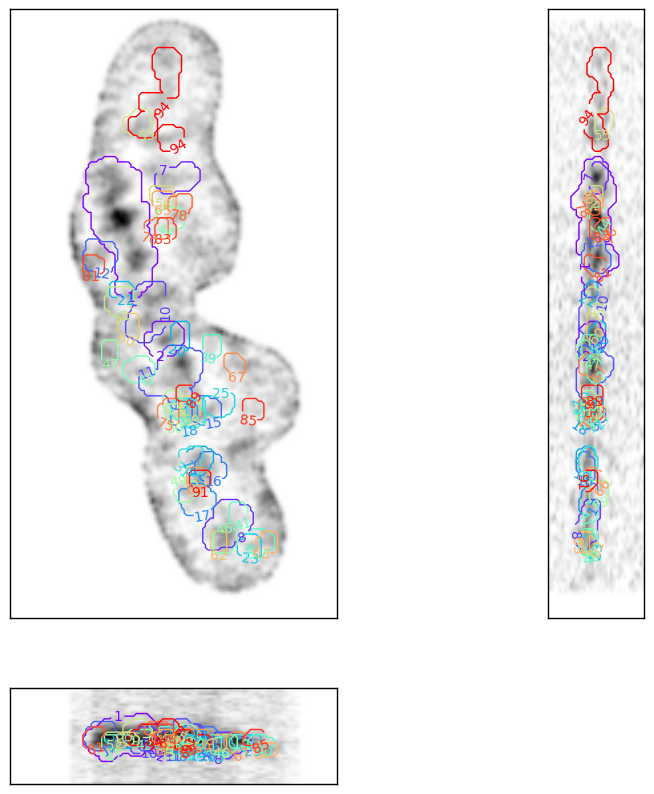

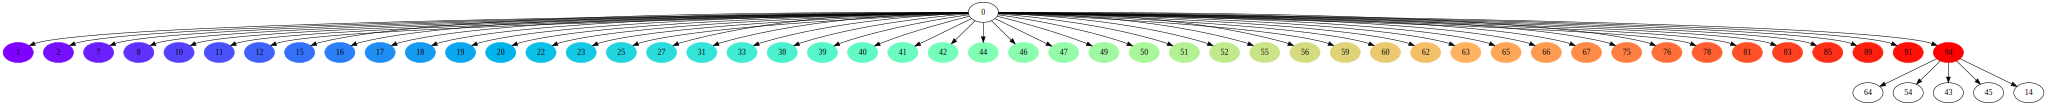

In [12]:
tree.group([14,64,43,45,54])
tree.show()

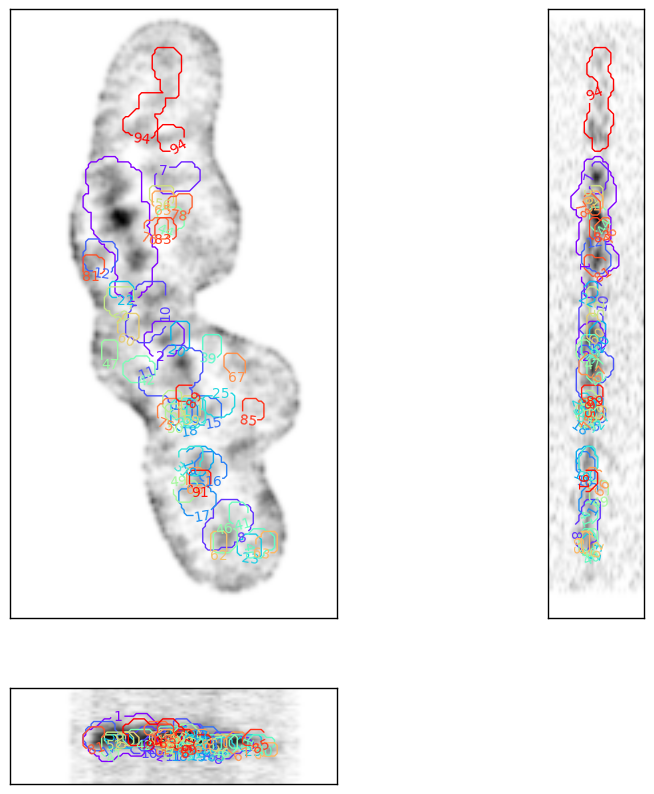

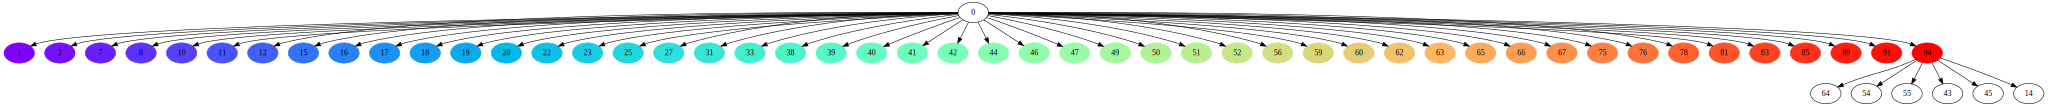

In [13]:
tree.add_to_group(94,[55])
tree.show()

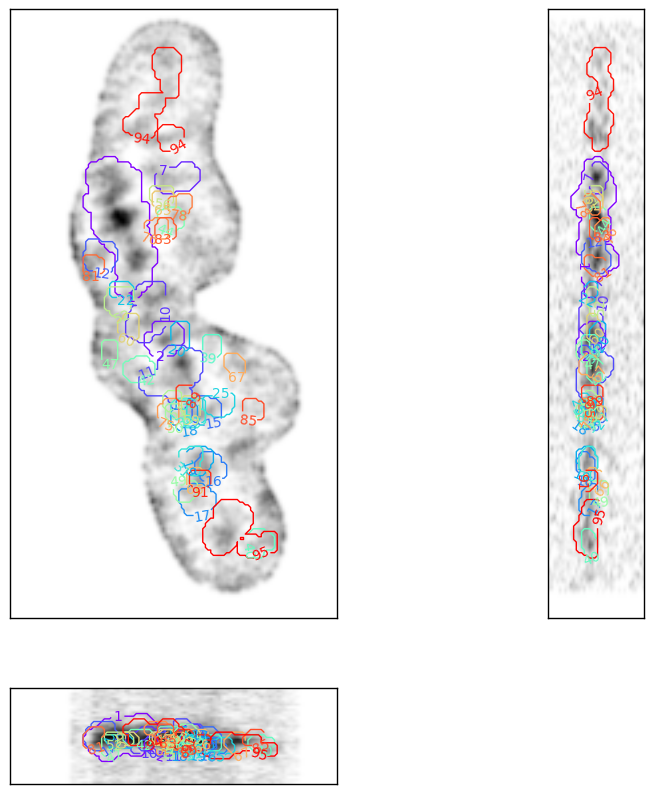

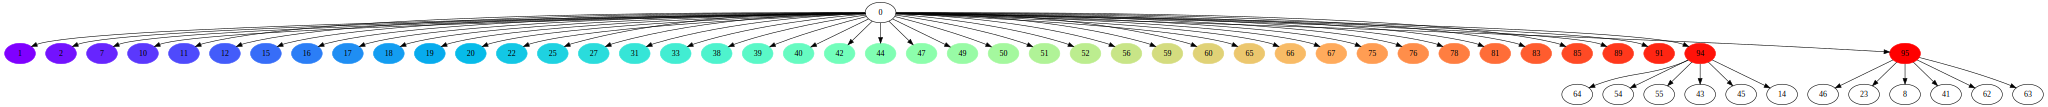

In [14]:
tree.group([46,23,8,41,62,63])
tree.show()

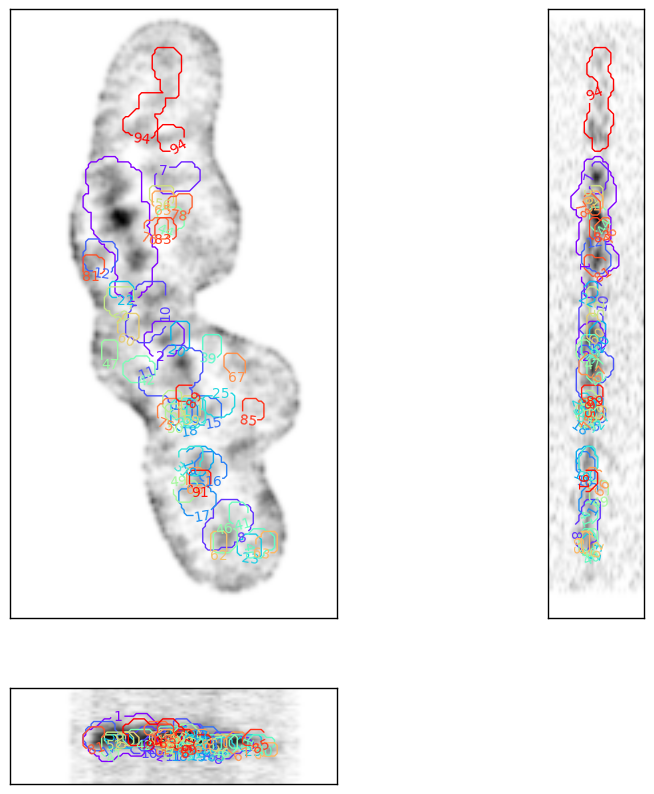

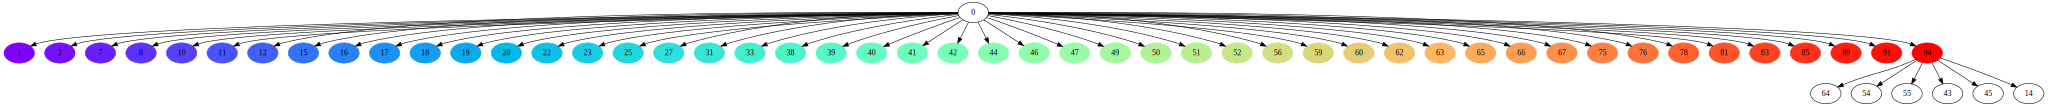

In [15]:
tree.ungroup(95)
tree.show()

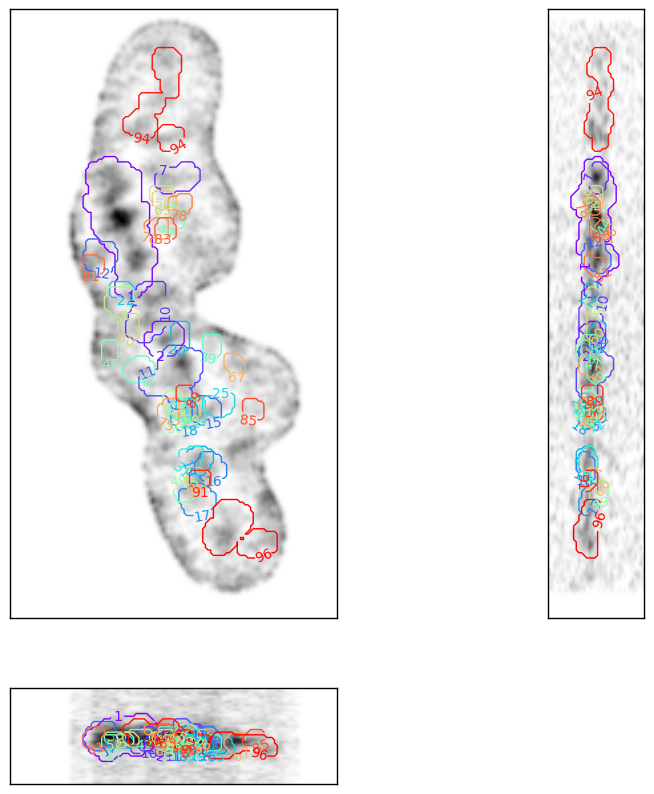

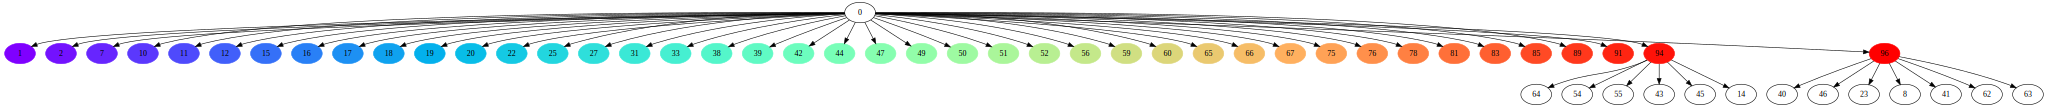

In [16]:
tree.group([46,23,8,41,62,63,40])
tree.show()

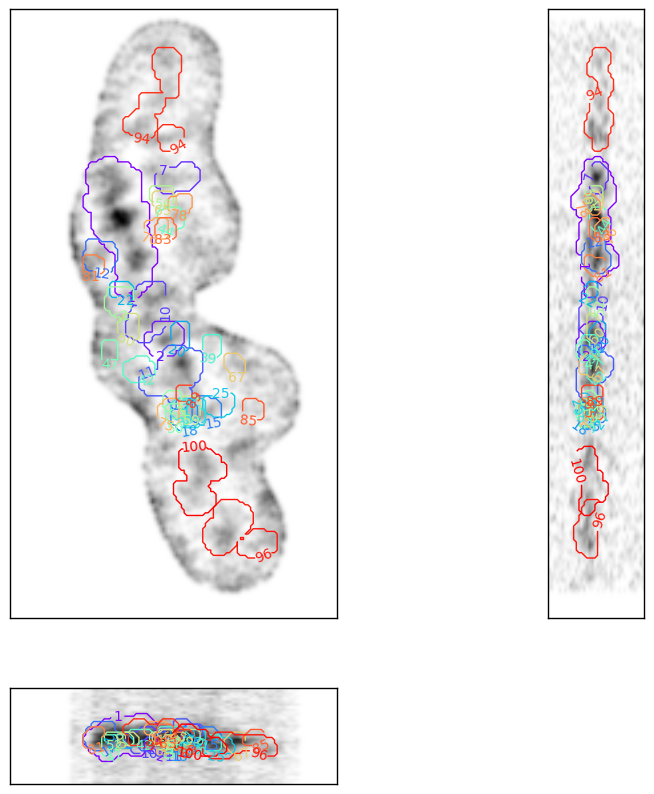

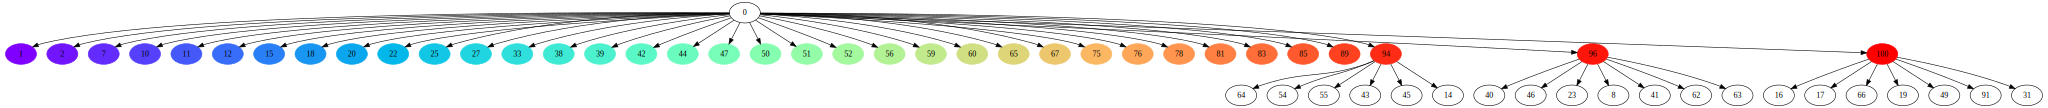

In [26]:
#tree.ungroup(97)
tree.group([17,16,19,31,49,66,91])
tree.show()

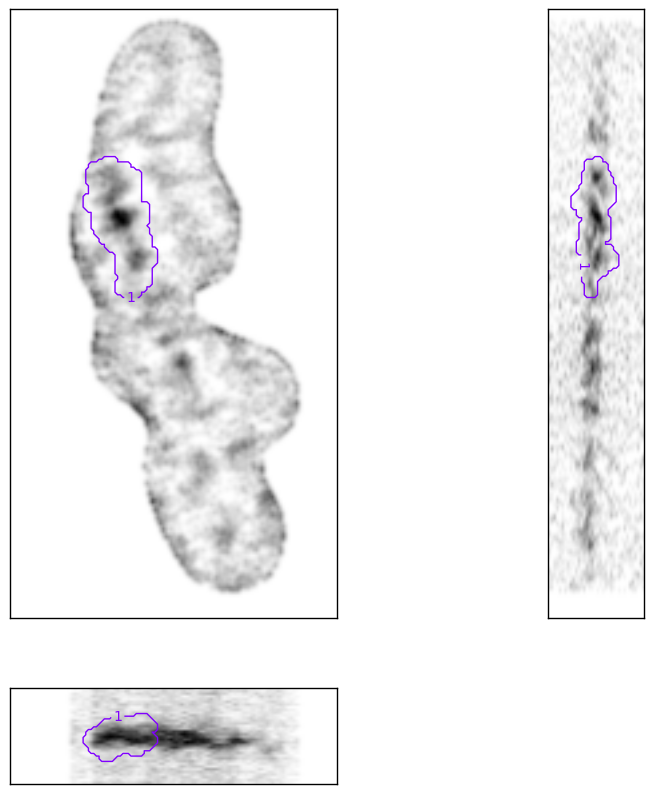

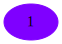

In [27]:
tree.show(1)

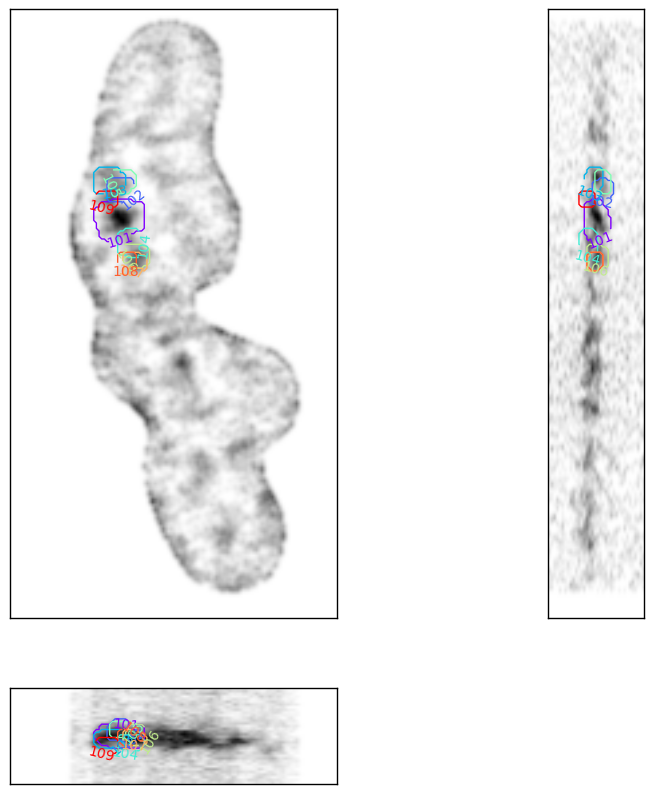

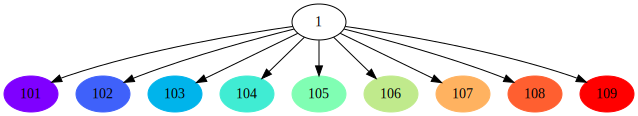

In [29]:

tree.clusterize(1,method='DBSCAN',param=1.5)
tree.show(1)

In [30]:
img=tree.synthesize(1)
img.select_region(interactive=True)

In [31]:
img2 = img.cut([[0, 115, 25], [35, 176, 58]])


In [33]:
img2.visualize()

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/ipyvolume/serialize.py:29: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [43]:
int(1.9)

2